In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

In [3]:
# from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq
from pytc2.general import print_latex, a_equal_b_latex_s

from schemdraw import Drawing
from pytc2.dibujar import dibujar_espacio_derivacion, dibujar_elemento_serie, dibujar_elemento_derivacion, dibujar_puerto_salida, dibujar_puerto_entrada
from pytc2.general import to_latex


<img src="./logo_UTN.svg" align="right" width="150" /> 

### Teoría de Circuitos II
#### Barrionuevo Cecilia

# Tarea Semanal 1

Dado el siguiente circuito:

<img src="./TS1_circuito.png"/> 

1. Analizar la impedancia de entrada desde el nodo Vx. Hallar los valores de $R4, R5, Y1, Y2$ e $Y3$ de tal manera que responda como un Inductor de valor unitario. 

2. Obtener la función transferencia $\frac{V2}{V1}$. Desnormalice convenientemente en frecuencia e impedancia para garantizar una $f0= 10kHz$ y $Q= 20$
  utilizando Capacitores entre $1 nF$ y $100 nF$. Para los resistores no hay restricciones. 

3.  Simule la transferencia desnormalizada en Python. Se sugiere programar la transferencia normalizada y definir las normas de frecuencia e impedancia para desnormalizar. Verificar los requerimientos pedidos en 2)

Bonus  

+1 💎 Obtener los valores de $R4$ y $R5$ para obtener un Pasa Banda con $+20 dB$ de ganancia en $f0$.

+1 💎 Observe la posibilidad ( no se pide realizar ninguna cuenta ) de conectar un GIC en el circuito de la Fig. 2  para reemplazo del Inductor. ¿Detecta algún inconveniente o limitación ?

+2 💎  Graficar la respuesta de modulo en LTspice con el eje Lineal en frecuencia. Halle numéricamente  $BW= f2-f1$ y verifique que $f0$ es la media geométrica entre $f2$ y $f1$
 

#### Punto 1: Analizar impedancia $Zx = sL$

La impedancia Zx es aquella definida por la relacion entre la tension del nodo Vx y la corriente que circula por la admitancia Y1 $$\frac{Vx}{Iy1} = Zx$$

Por un estudio de nodos y mallas, se llega a la conclusion que la Zx respeta a la siguiente expresion: $$Zx = \frac{Y2.Y4}{Y1.Y3.Y5} = \frac{Z1.Z3.R5}{Z2.R4}$$

La impedancia requerida en Zx es aquella dada por un inductor unitario, por lo que $Zx = s$

$$\frac{Z1.Z3.R5}{Z2.R4} = s$$

Por equivalencia de impedancias, podemos decir que $$\frac{[L]}{[C]} = [R]^2= s$$
$$\frac{[Z1].[Z3].[R5]}{[Z2].[R4]} = [Hy]$$
Y como $$[Z4] = [Z5] = \Omega$$
Entonces, 

$$[Z1] = \Omega$$ $$[Z3] = \Omega$$ $$[Z2] = Faradios$$


#### Punto 2: Obtener la función transferencia $\frac{V2}{V1}$. 
#### Desnormalice convenientemente en frecuencia e impedancia para garantizar una $f0= 10kHz$ y $Q= 20$.

Por trabajo de nodos y mallas (ver anexo), llegamos a la siguiente expresion:


$$\frac{V2}{V1} = \frac{s (\frac{1}{R.C}) (\frac{R4}{R5} + 1)}{s^2 + s(\frac{1}{R.C}) + \frac{R4}{C2.R1.R3.R5.C}}$$

A su vez, si hacemos una comparación con el siguiente circuito y su transferencia:

\begin{equation}
H(s) = \frac{K.\omega_0^2}{s^2+s\frac{\omega_0}{Q}+\omega_0^2}.
\end{equation}

Hallamos una expresion normalizada reemplazando con la expresion $s = \$ . \omega_0$

\begin{equation}
H(s) = K.\frac{\omega_0^2}{(\$ . \omega_0)^2+(\$ . \omega_0)\frac{\omega_0}{Q}+\omega_0^2}.
H(s) = K.\frac{1}{(\$)^2+(\$)\frac{1}{Q}+1}.
\end{equation}


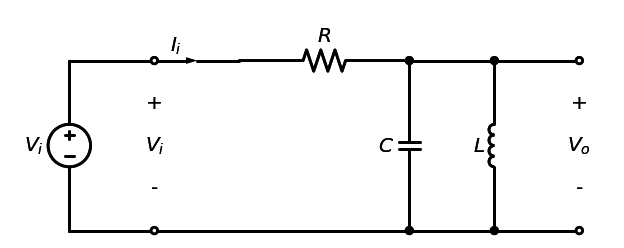

In [6]:

d = Drawing(unit=4)
d = dibujar_elemento_derivacion(d, "V",  with_nodes=False, sym_label="V_i")
d = dibujar_espacio_derivacion(d)
d = dibujar_puerto_entrada(d, voltage_lbl=('+', to_latex('V_i'), '-'), current_lbl=to_latex('I_i'))
d = dibujar_elemento_serie(d, "R", sym_label="R")
d = dibujar_elemento_derivacion(d, "C", sym_label="C")
d = dibujar_espacio_derivacion(d)
d = dibujar_elemento_derivacion(d, "L", sym_label="L")
d = dibujar_puerto_salida(d, voltage_lbl=('+', to_latex('V_o'), '-'))
display(d)

Llegamos a las siguientes conclusiones (para frecuencia normalizada $\Omega _n = 2.\pi.f_0$)

$$\frac{\omega_0}{Q} = \frac{1}{Q} = \frac{1}{R.C} \tag{1}$$
$$\omega_0^2 = 1 = \frac{R_4}{C_2.R_1.R_3.R_5.C}   \tag{2}$$
$$K = \frac{R_4}{R_5} + 1   \tag{3}$$

Y realizamos los siguientes planteos:

Teniendo en cuenta la dispersion de valores que presentan los capacitores reales, establecemos como norma $C = C_1 = 1$, y de la ecuacion (2) despejamos:
$$\omega_0^2 = \frac{R_4}{R_1.R_3.R_5}$$

Establecemos los valores normalizados de $R_3$ y $R_5$, debido a que no limitan de forma crítica el sistema
$$R_3 = 1 \wedge R_5=1$$

Lo que nos lleva a que:
$$R_1 = R_4 $$

De la ecuacion (1), establecemos:
$$\frac{1}{Q} = \frac{1}{R.C} \tag{1}$$
$$R = Q = 20$$

Por ultimo, de la ecuacion (3) y con $K=10$ y $R_5 = 1$(ver bonus 1),
$$10 = \frac{R_4}{1} + 1$$
$$R_4 = 9 = R_1$$

Luego de lo desarrollado, obtenemos el siguiente planteo de normalizaciones

\begin{gather}
R_n = 20\\
C_n = 1\\
Cn_2 = 1\\
Rn_1 = 9\\
Rn_3 = 1\\
Rn_4 = 9\\
Rn_5 = 1
\end{gather}


## Desnormalizacion
Norma de frecuencia $\Omega_\omega = 2.\pi.f_0 = 62831.85 rad/s$
Reglas de desnormalizacion de componentes
$$R = R_n \Omega_Z$$
$$C = \frac{C_n}{\Omega_Z . \Omega_w }$$
$$L = \frac{\Omega_Z . L_n}{\Omega_w }$$

Determinamos capacitores de 10nF $\longrightarrow$ determinamos nuestra norma de impedancia
$$C = C_2 = 10nF$$
$$C = \frac{1}{\Omega_Z . \Omega_w } = 10nF$$
$$\Omega_Z = \frac{1}{ 10nF . 62831.85 rad/s} = 1591.55 \Omega$$
\\
$$R = 20 \Omega_Z = 31.831k\Omega$$
\\

$$L_n = \frac{Rn_1 . Rn_3 . Rn_5 . Cn_2}{Rn_4} = 1 $$
$$L = \frac{R_1 . R_3 . R_5 . C_2}{R_4} = \frac{\Omega_Z}{\Omega_w } \approx 0.0253$$
$$\frac{R_1 . R_3 . R_5 }{R_4} = \frac{\Omega_Z}{\Omega_w } \approx \frac{0.0253}{10nF} \approx 2.53.10^6 . \Omega^2$$

Seteamos

$$R_1 = R_4 = 1k\Omega$$
$$R_3 = R_5 = \approx \sqrt[2]{2.53.10^6} \approx 1.59k\Omega$$




(2, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

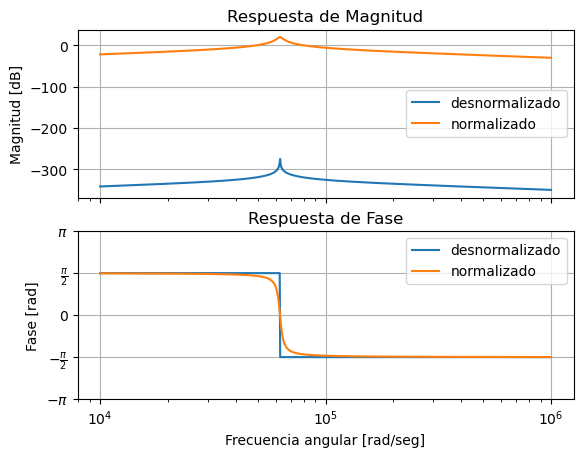

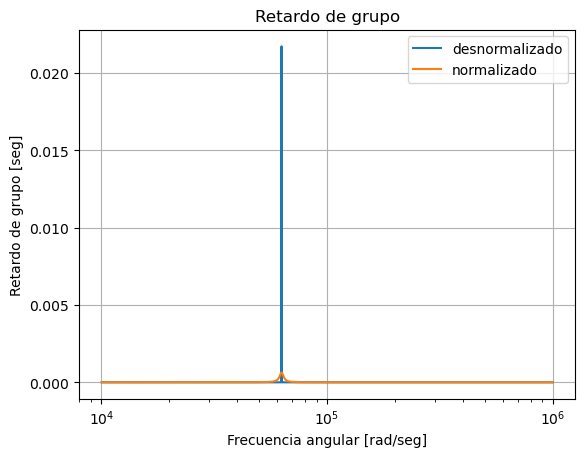

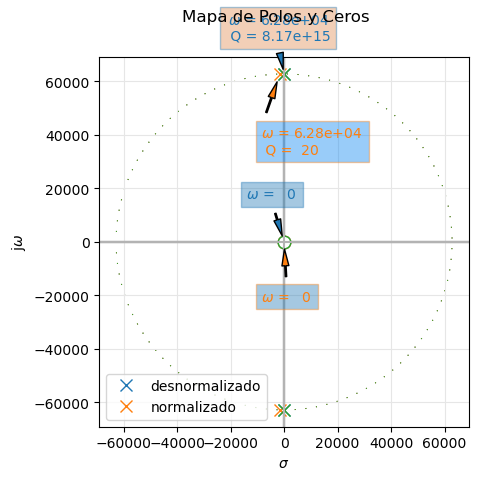

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 15 19:06:35 2025

@author: cecil
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.signal import TransferFunction
from scipy import signal as sig

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import analyze_sys,pzmap, GroupDelay, bodePlot



""""""""""""""""""""

norm_imp = 1591.55
norm_frec = 62831.85

Rn = 20
Cn = 1
R1n = 9
R3n = 1
R5n = 1
C2n = 1
R4n = 9

R = Rn * norm_imp
C = Cn / (norm_frec * norm_imp)
R1 = R1n * norm_imp 
R3 = R3n * norm_imp
R5 = R5n * norm_imp
C2 = C2n / (norm_frec * norm_imp)
R4 = R4n * norm_imp

w0 = 62831.85
Q = 20
K = 10

num1 = np.array([K * w0 / Q, 0 ])
den1 = np.array([ 1., w0 / Q, w0**2 ])

num = np.array([ (1/R*C)*(R4/R5 + 1), 0 ])
den = np.array([ 1, (1/R*C), (R4/(C2*R1*R3*R5*C)) ])

""""""""""""""""""""""""""""""""""""""

my_tf = TransferFunction(num, den)
my_tf2 = TransferFunction(num1, den1)

_ = analyze_sys([my_tf], sys_name='desnormalizado')
_ = analyze_sys([my_tf2], sys_name='normalizado')


pzmap(my_tf, fig_id=2) #S plane pole/zero plot

# ANEXO



<img src="./1_7.jpg"/> 
<img src="./2_7.jpg"/> 
<img src="./3_7.jpg"/> 
<img src="./4_7.jpg"/> 
<img src="./5_7.jpg"/> 
<img src="./6_7.jpg"/> 
<img src="./7_7.jpg"/> 